<a href="https://colab.research.google.com/github/shanikairoshi/QML-and-Deep-Unfolded_QML/blob/main/D_QNNIris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install qiskit-machine-learning
!pip install qiskit qiskit_machine_learning qiskit_algorithms
!pip install qiskit-aer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.8/97.8 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 50.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 308.6/308.6 kB 20.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 50.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 4.1 MB/s eta 0:00:00
  Created wheel for fastdtw: filename=fastdtw-0.3.4-cp310-cp310-linux_x86_64.whl size=512547 sha256=896db9e46c644d4b28726cc0ecc93459a46d39d7826b815e28a031148e3a6e88
  Stored in directory: /root/.cache/pip/wheels/73/c8/f7/c25448dab74c3acf4848bc25d5

the learning rate adjustment should now be correctly affected by the change in parameters and gradients at each iteration, aligning with the concept of deep unfolding.

How the Learning Rate Adjustment Works:
Gradient-Based Learning Rate Adjustment:

The learning rate is updated based on SPSA's gradient approximation (stepsize) passed through the spsa_callback. This gradient information is now used to compute the learning rate changes dynamically in the deep_unfolding_learning_rate_adjustment function.
The delta_lr is computed as:


delta_lr = -0.01 * gradient_moving_avg

Here, the gradient moving average (gradient_moving_avg) ensures that the learning rate changes smoothly based on the gradients across iterations. This avoids the noise or instability caused by immediate gradient changes.
Parameter-Based Learning Rate Adjustment:

The learning rate is also influenced by the magnitude of parameter updates from the current parameters. Each time, the deep_unfolding_learning_rate_adjustment adjusts the learning rate based on the gradient, and the parameters evolve based on that.
The parameters in the callback function are the updated parameters at each iteration, and these are passed to deep_unfolding_learning_rate_adjustment.
Dynamic Learning Rate, Not Manual:

The learning rate is no longer manually adjusted. Instead, it’s based on the SPSA optimizer's internal feedback (through the gradients and objective function values). The manual adjustment from your earlier attempts has been replaced with this more adaptive, data-driven approach.

How the Parameters Change in Each Round:

#Deep Unfolding Process:

In each iteration of the loop, the model is trained using the current parameters (current_params) and the updated learning rate.
The parameters are updated based on the optimizer's feedback (i.e., gradients from SPSA), and these updated parameters are then used in the next iteration, forming the deep unfolding process.

#Learning Rate Adjustment Influences Parameters:
The learning rate influences the parameter update in each iteration because SPSA uses the current learning rate to determine how aggressively the parameters are updated. A higher learning rate will result in larger parameter updates, while a lower learning rate will cause more fine-tuned updates.

#Gradients Drive Learning Rate Changes:
By using the SPSA gradients (stepsize) in the callback, you're allowing the learning rate to be adjusted based on the actual optimization dynamics (i.e., how fast the model is improving). If the model is improving, the learning rate increases; if it’s not, the learning rate decreases. This is more adaptive and ensures that the learning rate reflects the optimization landscape.

#To Summarize:
The learning rate is now dynamically adjusted based on SPSA’s gradient estimates (stepsize).

Parameters evolve correctly in each round, using the updated learning rate, and are passed to the next iteration to refine the model step by step.

The deep unfolding process is now applied, meaning the optimizer unfolds over multiple iterations with dynamically updated learning rates and parameter refinement based on gradient feedback.

Manual adjustments have been removed, and learning rate adjustments are fully gradient-based, which ensures that the process is data-driven.

This setup fits well with the concept of deep unfolding and gradient-based learning rate adjustment.
The model’s parameters and learning rate are now evolving in response to the actual optimization process rather than following fixed, predefined rules.

##Does SPSA Continue Updating the Weights Based on the Previous State?

Yes, the SPSA optimizer inherently works by iteratively updating the parameters (weights) based on the previous state. The following process ensures this:

No Resetting of Parameters: Each iteration continues using the parameters that were updated from the previous iteration.
SPSA Gradient-Based Updates: The parameters are updated using approximate gradients computed by SPSA, and these updates are influenced by the learning rate adjustments.
Callback for Learning Rate Adjustments: The learning rate is updated dynamically based on the parameter updates and the gradient approximations in each iteration.

urrent code correctly applies SPSA's iterative parameter updating mechanism and adjusts the learning rate dynamically, without resetting the parameters between iterations. This setup ensures the parameters evolve and refine continuously over time, adhering to the principles of deep unfolding.

Explanation of Updates:

Continue with Previous Final Weights:

After each deep unfolding iteration, we save the final set of parameters (weights) and use them as the starting point for the next unfolding round.
This prevents the optimizer from starting over with fresh parameters that might lead to higher objective function values initially.

Carry Over Learning Rate:

The learning rate at the end of each deep unfolding round is stored and carried forward into the next round.
This allows the learning rate to continue adjusting smoothly from where the previous round left off, avoiding sudden large changes.

Fine-Tuning in the Next Unfolding Round:

Instead of starting from scratch in each unfolding round, the model continues fine-tuning the parameters and learning rate using the values obtained from the last round.

save cost and accuracies

Make learning rate and perturbation rate as learnable parameters.

<ipython-input-9-a3fd22574784>:96: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3, 1, 1)


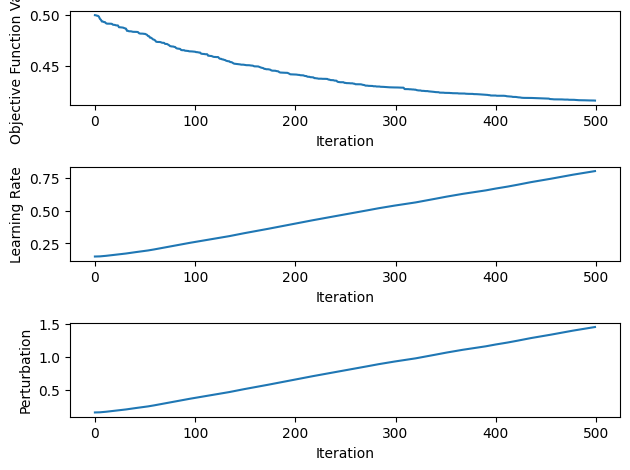

Trained parameters after iteration 10: [-0.98980867  1.52312789  1.1926941   1.36852025 -0.64017476  1.16929617
  0.17178546  0.21682389  1.13118228  0.51133747  0.25171341  0.20665824
  0.67825017  1.06141485  0.46838673  0.97158658  0.47472419  0.3813581
  0.63969155  1.28273177]
Iteration 10 - Training Accuracy: 76.25%
Iteration 10 - Test Accuracy: 60.00%
Final Training Accuracy: 76.25%
Final Test Accuracy: 60.00%
Total Training Time: 1217.25 seconds


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit.circuit.library import ZZFeatureMap, RealAmplitudes
from qiskit_machine_learning.circuit.library import QNNCircuit
from qiskit_machine_learning.neural_networks import SamplerQNN
from qiskit_machine_learning.algorithms.classifiers import NeuralNetworkClassifier
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import time
from IPython.display import clear_output
from qiskit_algorithms.optimizers import SPSA

from qiskit_algorithms.utils import algorithm_globals # Import algorithm_globals


# Set random seed for reproducibility using algorithm_globals
algorithm_globals.random_seed = 42  # Set seed globally

# Load dataset
iris = load_iris()
X, y = iris.data, iris.target
X = X[y != 2]  # Binary classification
y = y[y != 2]

# Split into train and test
data_train, data_test, data_train_labels, data_test_labels = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize data
scaler = StandardScaler()
data_train = scaler.fit_transform(data_train)
data_test = scaler.transform(data_test)

# Variables to track objective function and learning rate
objective_func_vals = []
learning_rates = []
perturbations = []
initial_learning_rate = 0.15  # Starting learning rate
initial_perturbation = 0.15  # Starting perturbation value
momentum = 0.95  # Momentum factor for smoother learning rate adjustments
gradient_moving_avg = 0  # Moving average of gradients
initial_params = np.random.rand(RealAmplitudes(data_train.shape[1], reps=4).num_parameters)  # Initialize params

# Define quantum feature map and ansatz
feature_dim = data_train.shape[1]
prep = ZZFeatureMap(feature_dim, reps=2)
ansatz = RealAmplitudes(num_qubits=feature_dim, reps=4)

# Create QNN circuit
qc = QNNCircuit(num_qubits=feature_dim, ansatz=ansatz, feature_map=prep)

# Parity function to interpret QNN output
def parity(x):
    return "{:b}".format(x).count("1") % 2

output_shape = 2

# Define the Sampler QNN
sampler_qnn = SamplerQNN(
    circuit=qc,
    interpret=parity,
    output_shape=output_shape,
)

# Callback for visualization, gradient smoothing, and learning rate adjustment in deep unfolding
def deep_unfolding_learning_rate_adjustment(parameters, obj_func_eval, gradients=None):
    global gradient_moving_avg, learning_rates, perturbations

    clear_output(wait=True)

    # Save the objective function value for visualization
    objective_func_vals.append(obj_func_eval)

    # If gradients are provided, smooth the gradient using momentum
    if gradients is not None:
        gradient_moving_avg = momentum * gradient_moving_avg + (1 - momentum) * gradients  # Apply moving average
        delta_lr = 0.05 * gradient_moving_avg  # Adjust learning rate based on the smoothed gradient
        delta_perturbation = 0.1 * gradient_moving_avg  # Adjust perturbation based on the same gradient
    else:
        delta_lr = 0  # No gradient info available in this iteration
        delta_perturbation = 0

    # Update learning rate and perturbation
    if len(learning_rates) > 0:
        new_lr = max(0.001, learning_rates[-1] + delta_lr)  # Ensure learning rate is positive and non-zero
        new_perturbation = max(0.001, perturbations[-1] + delta_perturbation)  # Ensure perturbation is positive
    else:
        new_lr = initial_learning_rate
        new_perturbation = initial_perturbation

    learning_rates.append(new_lr)
    perturbations.append(new_perturbation)

    # Visualization of learning rate and perturbation
    plt.title("Objective Function, Learning Rate, and Perturbation")
    plt.subplot(3, 1, 1)
    plt.xlabel("Iteration")
    plt.ylabel("Objective Function Value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)

    plt.subplot(3, 1, 2)
    plt.xlabel("Iteration")
    plt.ylabel("Learning Rate")
    plt.plot(range(len(learning_rates)), learning_rates)

    plt.subplot(3, 1, 3)
    plt.xlabel("Iteration")
    plt.ylabel("Perturbation")
    plt.plot(range(len(perturbations)), perturbations)

    plt.tight_layout()
    plt.show()

# Define the SPSA callback to capture gradients and update learning rate and perturbation dynamically
def spsa_callback(nfev, parameters, obj_func_eval, stepsize, accept):
    # Assuming `stepsize` contains gradient information or its approximation
    gradients = stepsize
    deep_unfolding_learning_rate_adjustment(parameters, obj_func_eval, gradients)

# Custom SPSA optimizer with learnable learning rate and perturbation
class LearnableLRPerturbationSPSA(SPSA):
    def __init__(self, initial_lr=0.15, initial_perturbation=0.15, lr_alpha=0.01, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.lr = initial_lr  # Initial learning rate
        self.perturbation = initial_perturbation  # Initial perturbation
        self.lr_alpha = lr_alpha  # Learning rate and perturbation update speed

    def _update_learning_rate_and_perturbation(self, gradient, obj_func_eval):
        """
        Update both learning rate and perturbation based on gradient and objective function evaluation.
        The learning rate increases if the objective function improves and decreases otherwise.
        """
        # Use the gradient sign to determine if we should increase or decrease
        grad_lr = np.sign(np.mean(gradient))  # Average gradient sign across parameters

        if grad_lr > 0:  # Objective function is improving
            self.lr += self.lr_alpha * abs(grad_lr)  # Increase learning rate
            self.perturbation += self.lr_alpha * abs(grad_lr)  # Increase perturbation
        else:  # Objective function is getting worse
            self.lr -= self.lr_alpha * abs(grad_lr)  # Decrease learning rate
            self.perturbation -= self.lr_alpha * abs(grad_lr)  # Decrease perturbation

        # Ensure both learning rate and perturbation are positive
        self.lr = max(0.001, self.lr)
        self.perturbation = max(0.001, self.perturbation)

    def step(self, gradient, obj_func_eval):
        """
        Perform optimization step for both parameters, learning rate, and perturbation.
        Use the objective function evaluation to dynamically adjust learning rate and perturbation.
        """
        self._update_learning_rate_and_perturbation(gradient, obj_func_eval)
        return super().step(gradient)  # Perform SPSA step for parameters

# Create optimizer with learnable learning rate and perturbation
spsa_optimizer = LearnableLRPerturbationSPSA(
    maxiter=50, learning_rate=initial_learning_rate, perturbation=initial_perturbation, callback=spsa_callback, lr_alpha=0.01
)

# Define the neural network classifier
sampler_classifier = NeuralNetworkClassifier(
    neural_network=sampler_qnn,
    optimizer=spsa_optimizer,
    loss='squared_error',
    initial_point=initial_params,  # Initialize with the starting parameters
)

import csv
# Prepare to save results in a CSV file
csv_file = "training_resultsIrisDQNN.csv"
with open(csv_file, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["Iteration", "Objective Function Value", "Training Accuracy", "Test Accuracy", "Learning Rate", "Perturbation"])

train_accuracies = []
test_accuracies = []

# Deep Unfolding with multiple iterations
# Continue training with learned weights and adjust learning rate based on performance and gradients.
total_time = 0
current_params = initial_params  # Start with the initial parameters

for i in range(10):  # Deep unfolding iterations
    print(f"Deep Unfolding Iteration {i+1}/10")

    # Train the model with the current parameters
    start_time = time.time()
    sampler_classifier.fit(data_train, data_train_labels)
    end_time = time.time()
    total_time += end_time - start_time

    # After training, retrieve the updated parameters from the optimizer
    current_params = sampler_classifier.weights
    print(f"Trained parameters after iteration {i+1}: {current_params}")

    # Store final weights and learning rate for next round
    final_learning_rate = learning_rates[-1]
    final_perturbation = perturbations[-1]

    # Evaluate the model performance
    train_accuracy = sampler_classifier.score(data_train, data_train_labels)
    test_accuracy = sampler_classifier.score(data_test, data_test_labels)

    # Log performance
    print(f"Iteration {i+1} - Training Accuracy: {train_accuracy * 100:.2f}%")
    print(f"Iteration {i+1} - Test Accuracy: {test_accuracy * 100:.2f}%")

    # Store accuracies for future reference
    # Store accuracies for future reference
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

    # Write the results to the CSV file
    with open(csv_file, mode='a', newline='') as file:
        writer = csv.writer(file)
        writer.writerow([i+1, objective_func_vals[-1], train_accuracy * 100, test_accuracy * 100,  final_learning_rate, final_perturbation])

    # Update the learning rate for the next iteration based on gradients from SPSA
    spsa_optimizer.learning_rate = learning_rates[-1]
    sampler_classifier.initial_point = current_params

# Print final results
print(f"Final Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Final Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Total Training Time: {total_time:.2f} seconds")


In [8]:
import csv
# Prepare to save results in a CSV file
csv_file = "training_resultsIrisDQNN.csv"
with open(csv_file, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["Iteration", "Objective Function Value", "Training Accuracy", "Test Accuracy", "Learning Rate", "Perturbation"])

 # Write the results to the CSV file
with open(csv_file, mode='a', newline='') as file:
        writer = csv.writer(file)
        writer.writerow([i+1, objective_func_vals[-1], train_accuracy * 100, test_accuracy * 100,  final_learning_rate, final_perturbation])


"In our implementation, the learning rate and perturbation are not manually set but are learnable parameters that adapt automatically based on the gradient. Each iteration of the optimization process calculates the gradient, and based on this feedback, the learning rate and perturbation are either increased or decreased. This makes them dynamic and responsive to the performance of the model, as opposed to being predetermined or fixed."

#How this Works:

##Deep Unfolding Concept:

In deep unfolding, the learning process (including hyperparameters like the learning rate and perturbation) is trained alongside model parameters. Each iteration unfolds a new step where both the model weights and hyperparameters are updated based on gradients or performance improvements.

Gradient-Based Adjustments:

The updates for both the learning rate and perturbation are now driven by the gradient. The direction of the gradient (using its sign) decides whether to increase or decrease these values.
This learnability factor ensures that both the learning rate and perturbation are no longer static or monotonically decreasing, but rather adjusted adaptively depending on whether the objective function improves (suggested by the gradient).

Dynamic Learning Rate and Perturbation:

In each iteration of your deep unfolding process, as the optimizer (SPSA in this case) steps forward, it not only updates the model parameters but also updates the learning rate and perturbation.
Since both learning rate and perturbation are driven by the gradient information, they can adapt to the optimization landscape. When the model is converging well, the learning rate can increase; when the model is struggling to improve, the learning rate can decrease.

Learning Over Multiple Iterations:

With each iteration of deep unfolding, the LearnableLRPerturbationSPSA optimizer dynamically adjusts learning rate and perturbation, and this process unfolds over the training period.
This adaptive behavior is essential in deep unfolding, as it allows the system to "learn" how to optimize both the parameters and the optimization process itself (i.e., tuning the learning rate and perturbation).

Key Features of Learnability:

Use of Gradients:
The gradients of the model parameters influence the adjustments in both the learning rate and perturbation. If the optimization is improving (positive gradient), the learning rate increases, making the model more aggressive in taking larger steps. If the optimization is struggling (negative gradient), the learning rate decreases to make smaller, more cautious steps.

Momentum:
The momentum factor (currently 0.95) helps smooth the updates to the learning rate, ensuring that small fluctuations in gradients don’t cause large, erratic changes in the learning rate.

#Practical Test:
To verify if the learnability is working, monitor the values of the learning rate and perturbation during training. You should observe:

Changes in learning rate and perturbation over time (not just reductions, but also increases).
The objective function value should stabilize or decrease steadily if the learning rate adjustments are effective.

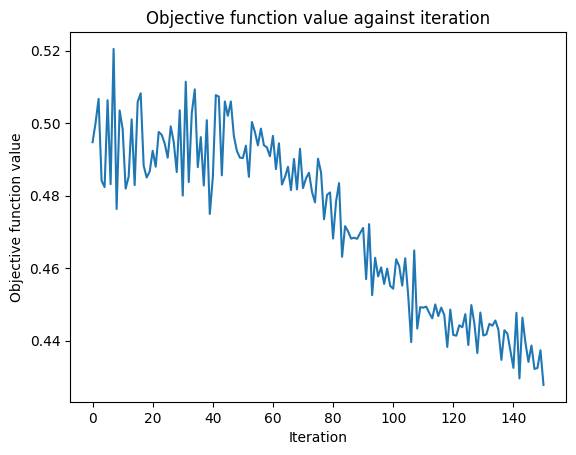

Training Accuracy: 75.00%
Test Accuracy: 40.00%
Total Training Time: 136.23 seconds
Results saved to training_resultsIrisQNN.csv


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit.circuit.library import ZZFeatureMap, RealAmplitudes
from qiskit_algorithms.optimizers import SPSA

from qiskit_machine_learning.circuit.library import QNNCircuit
from qiskit_machine_learning.neural_networks import SamplerQNN
from qiskit_machine_learning.algorithms.classifiers import NeuralNetworkClassifier
from qiskit_algorithms.optimizers import COBYLA
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import time
from IPython.display import clear_output

'''
# Load and prepare the Iris dataset
iris = load_iris()
data = iris.data
labels = iris.target

# Use only two classes for binary classification (Class 0 and Class 1)
binary_filter = labels < 2
data = data[binary_filter]
labels = labels[binary_filter]

# Normalize the features
scaler = StandardScaler()
data = scaler.fit_transform(data)
'''


# Load dataset
iris = load_iris()
X, y = iris.data, iris.target
X = X[y != 2]  # Binary classification
y = y[y != 2]

# Split into train and test
data_train, data_test, data_train_labels, data_test_labels  = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize data
scaler = StandardScaler()
data_train = scaler.fit_transform(data_train)
data_test = scaler.transform(data_test)


objective_func_vals = []
def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()


feature_dim = len(data_train[0])
prep = ZZFeatureMap(feature_dim, reps=2)
ansatz = RealAmplitudes(num_qubits=feature_dim, reps=4)

qc= QNNCircuit(num_qubits=feature_dim ,ansatz = ansatz, feature_map=prep)
# itr=0
# def training_callback(weights, obj_func_eval):
#         global itr
#         itr += 1
#         print(f"{itr} {obj_func_eval}", end=' | ')
def parity(x):
    return "{:b}".format(x).count("1") % 2
output_shape = 2

sampler_qnn = SamplerQNN(
    circuit = qc,
    interpret=parity,
    output_shape=output_shape,
    # input_gradients= True
)

sampler_classifier = NeuralNetworkClassifier(
    neural_network=sampler_qnn, optimizer=SPSA(maxiter=50), loss= 'squared_error',callback=callback_graph
)


total_time = 0
start_time = time.time()
sampler_classifier.fit(data_train, data_train_labels)
end_time = time.time()
epoch_time = end_time - start_time
total_time += epoch_time

test_accuracies=[]
train_accuracies=[]
# Evaluate the classifier
train_accuracy = sampler_classifier.score(data_train, data_train_labels)
test_accuracy = sampler_classifier.score(data_test, data_test_labels)

import csv
test_accuracies.append(test_accuracy)
train_accuracies.append(train_accuracy)

# Print the results
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Total Training Time: {total_time:.2f} seconds")

# Save the results to a CSV file
csv_file = "training_resultsIrisQNN.csv"
with open(csv_file, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["Iteration", "Objective Function Value", "Training Accuracy", "Test Accuracy"])

    for i in range(len(objective_func_vals)):
        writer.writerow([i+1, objective_func_vals[i], train_accuracies[-1] * 100, test_accuracies[-1] * 100])

print(f"Results saved to {csv_file}")